In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["default"](checkpoint="D:/Documents/AAA_Hochschule/SoSe_24/Biometrics/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
image = cv2.imread("C:/Users/nweiand/Pictures/DCIM/100CASIO/CIMG2261.JPG")
masks = mask_generator.generate(image)

In [7]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

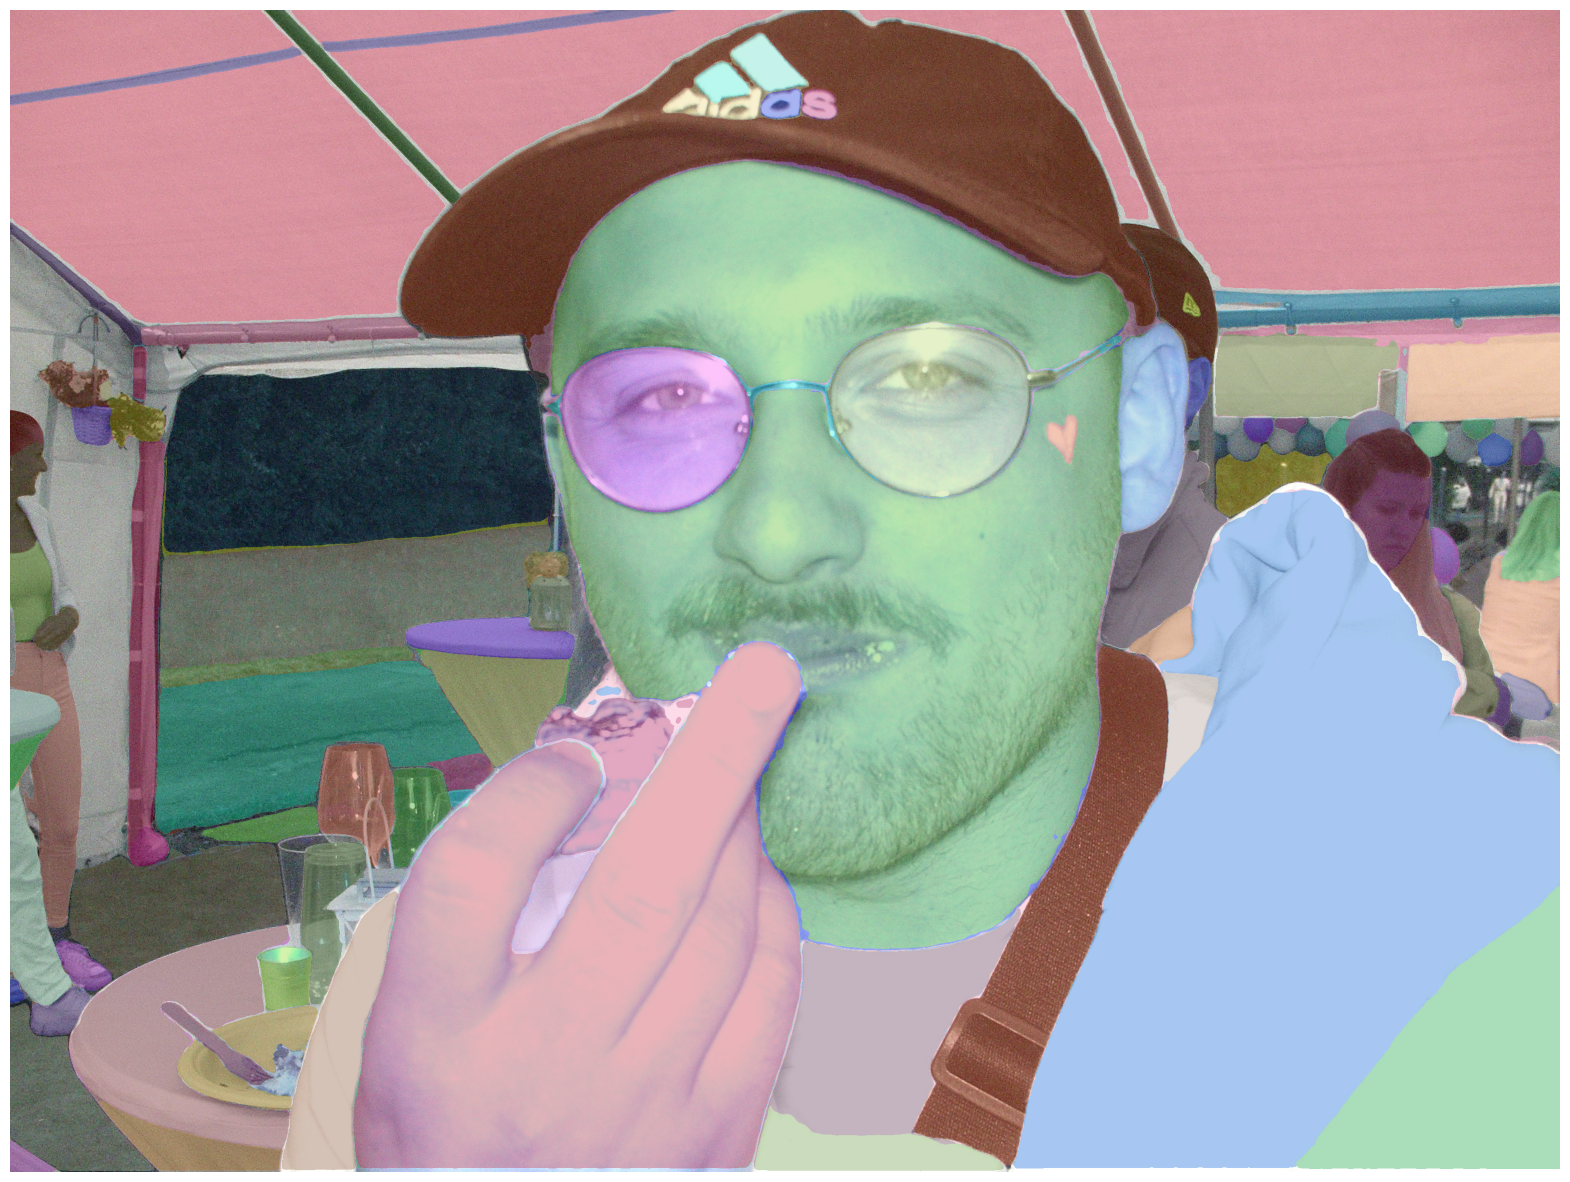

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()